In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from numpy import array
from numpy import array, arange, abs as np_abs
from numpy.fft import rfft, rfftfreq
from math import sin, pi
from scipy import signal
import matplotlib.pyplot as plt

from model import *
from view import *

In [2]:
def get_U(t,F,A=1):
    return A*np.sin(2 * np.pi * F * t)

In [3]:
duration = 1000e-6
F_main_real=440e3

fs = F_main_real*20

F_noise_1=100e3
F_noise_2=700e3
F_noise_3=200e3

t = np.linspace(0, duration, int(duration * fs))  

U = get_U(t,F_main_real,2)+get_U(t,F_noise_1)+get_U(t,F_noise_2)+get_U(t,F_noise_3)

In [4]:
R= 100
C= 475e-10

t,I= RC_transfer(t,U,R,C)

440008.81684491975


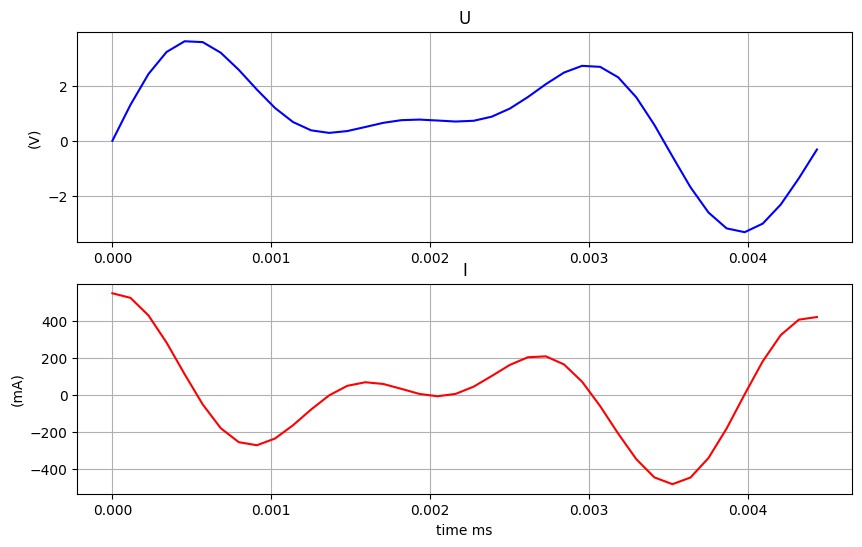

In [5]:
F,V = get_spectrum3([t,U])

F_peak_calc = F[np.argmax(V)]
T=1/F_peak_calc

print(F_peak_calc)

T_counts=convert_to_counts(t,T)

window=T_counts*2

show_I_U(t,I,U,0,window)

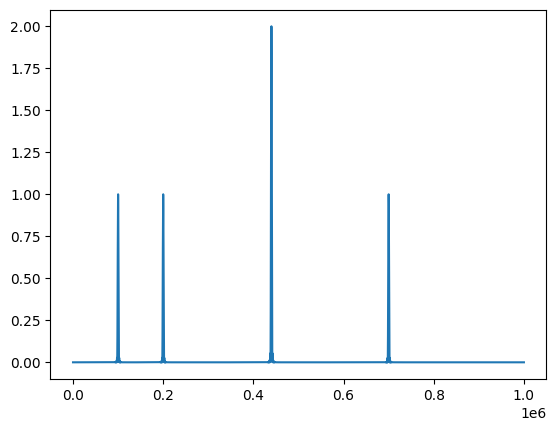

In [6]:
plt.plot(F,V)

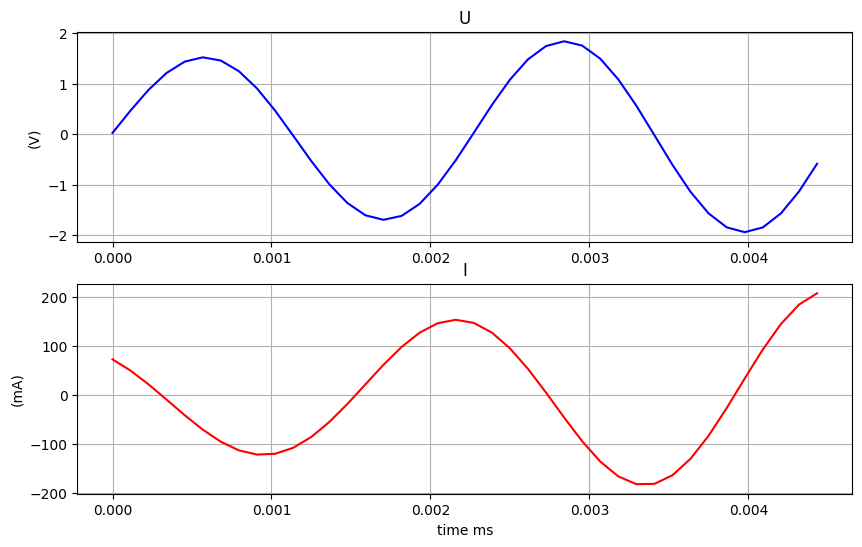

In [7]:
t_f, U_f=filter_butter_bandpass(t,U,F_peak_calc,50e3)
t_f, I_f=filter_butter_bandpass(t,I,F_peak_calc,50e3)

show_I_U(t_f,I_f, U_f,0,window)

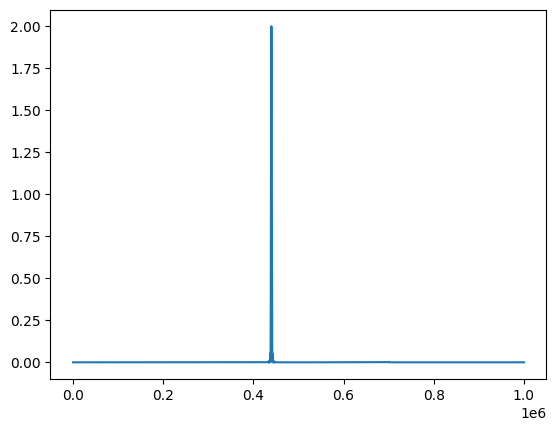

In [8]:
F_f,V_f = get_spectrum3([t,U_f])
plt.plot(F_f,V_f)

np.float64(85.58072774917983)

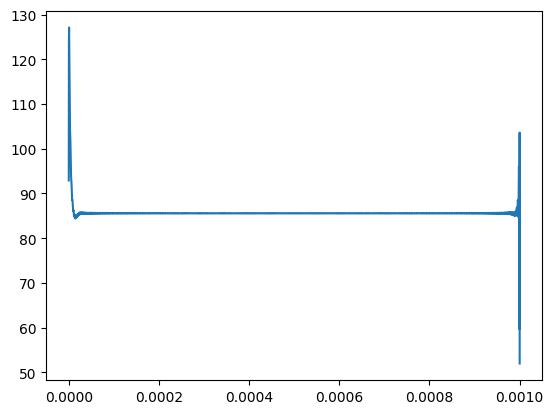

In [10]:
time_hilbert, phase_hilbert=get_phase_hilbert(t_f, U_f, I_f)

plt.plot(time_hilbert, phase_hilbert)

phase_mean=abs(np.mean(phase_hilbert))

central_index=int(len(phase_hilbert)/2)
phase_mean=phase_hilbert[central_index]
phase_mean

In [11]:
# Сравнение частоты 

f_rel_real=1/(2*pi*R*C)
f_rel_real

33506.30380882007

In [12]:
f_rel_calc_mean = F_peak_calc * np.cos(phase_mean*0.0174533) / np.sin(phase_mean*0.0174533)
print(f_rel_calc_mean)

34005.433281302896


[85.55093057 85.49683364 85.56105299 85.5565735  85.50410302 85.57595413
 85.66856644 85.60834352 85.52670093 85.57035989 85.59800561 85.54186655
 85.56495089 85.66158902 85.64284758 85.54421    85.54886831 85.59009799
 85.54485225 85.52740854 85.60947248 85.6304547  85.54444587 85.51998302
 85.56909769 85.55327482 85.51970888 85.58168899 85.63455232 85.57885711
 85.53480904 85.57784311 85.58733904 85.54730627 85.57843297 85.6403333
 85.60945838 85.54902697 85.57072875 85.59270843 85.55307044 85.55391043
 85.61043207 85.60151359 85.54058723 85.54472064 85.57743694 85.55198143
 85.53764064 85.58723481 85.60031822 85.55167336 85.54466453 85.58454078
 85.57629127 85.55325597 85.59011203 85.61590845 85.57531397 85.55412569
 85.59073861 85.59335723 85.56136967 85.57976315 85.60910098 85.57244506
 85.53916089 85.5706208  85.58589144 85.55269141 85.55773718 85.59257239
 85.56630298 85.52722688 85.55638163 85.59065182 85.56527298 85.55992182
 85.60005789 85.58868275 85.54082954 85.55947069 85.

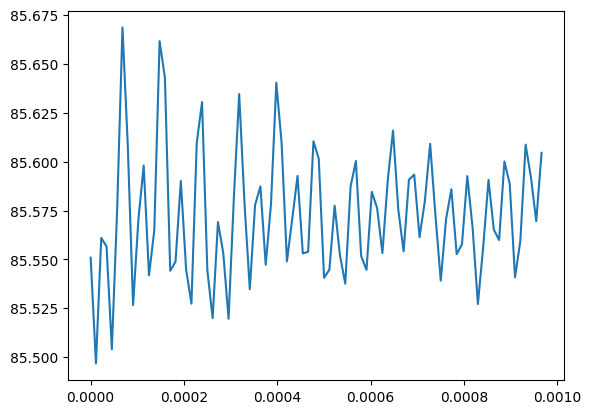

In [13]:
times, phase_diff = get_phase_FFT(U, I, fs, F_peak_calc, n_periods=10, overlap=0.5)

print (phase_diff)
plt.plot(times, phase_diff)